In [1]:
import pandas as pd
import ast
import numpy as np
from functools import partial
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import keras
import random
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2023-09-29 17:49:06.644144: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1. Load data

In [44]:
data = pd.read_csv('data/avg_padded_truncated_mfcc_500ms.csv')

mfcc_columns = [f'mfcc_{i}' for i in range(1, 14)]
num_mfccs = int(data['num_mfcc_values'][0])
mfcc_columns = [f'mfcc_{i}' for i in range(1, 14)]
X = np.array([data[mfcc_column].apply(eval).tolist() for mfcc_column in mfcc_columns])
# Reshape X to (number of instances, num_mfccs, 13, 1)
X = X.transpose(1, 0, 2)  # Transpose to (13, number_of_samples, reference_length)
X = X.reshape(-1, num_mfccs, 13, 1)
y = data['label']

In [45]:
label_mapping = {'N': 0, 'S1': 1, 'S2':1, 'S3':1}
y= y.replace(label_mapping)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Classification

In [46]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(num_mfccs, 13, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
                 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Adjust num_classes

# 7. Compile and Train the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1=model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
840/840 [==============================] - 4s 4ms/step - loss: 0.4759 - accuracy: 0.9190 - val_loss: 0.1372 - val_accuracy: 0.9564
Epoch 2/20
840/840 [==============================] - 3s 4ms/step - loss: 0.1786 - accuracy: 0.9413 - val_loss: 0.1179 - val_accuracy: 0.9594
Epoch 3/20
840/840 [==============================] - 4s 4ms/step - loss: 0.1374 - accuracy: 0.9527 - val_loss: 0.2105 - val_accuracy: 0.9252
Epoch 4/20
840/840 [==============================] - 3s 4ms/step - loss: 0.1247 - accuracy: 0.9546 - val_loss: 0.1153 - val_accuracy: 0.9599
Epoch 5/20
840/840 [==============================] - 4s 5ms/step - loss: 0.1076 - accuracy: 0.9593 - val_loss: 0.1034 - val_accuracy: 0.9611
Epoch 6/20
840/840 [==============================] - 4s 5ms/step - loss: 0.1058 - accuracy: 0.9610 - val_loss: 0.0954 - val_accuracy: 0.9651
Epoch 7/20
840/840 [==============================] - 4s 5ms/step - loss: 0.0929 - accuracy: 0.9667 - val_loss: 0.0924 - val_accuracy: 0.9674
Epoch 

In [13]:
#function to plot accuracy, loss and learning rate
def plot_loss_accuracy(history):
    # Create a 1x3 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    # Plot Accuracy Curve
    axes[0].plot(history.history['accuracy'], 'r-', label='Training Accuracy')
    axes[0].plot(history.history['val_accuracy'], 'b-', label='Validation Accuracy')
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Accuracy")
    axes[0].set_title("Accuracy Curve")
    axes[0].grid(True)
    axes[0].legend(loc="lower right")

    # Plot Loss Curve
    axes[1].plot(history.history['loss'], 'r-', label='Training Loss')
    axes[1].plot(history.history['val_loss'], 'b-', label='Validation Loss')
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Loss")
    axes[1].set_title("Loss Curve")
    axes[1].grid(True)
    axes[1].legend(loc="upper right")

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the combined plot
    plt.show()

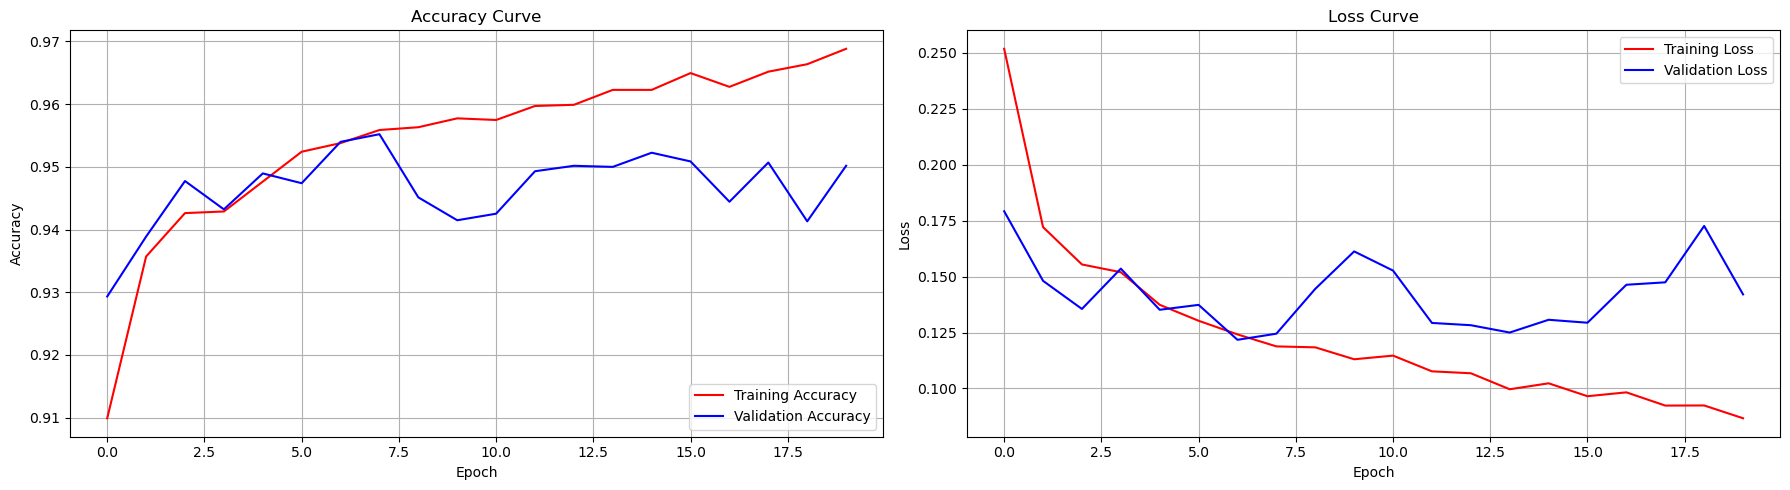

In [14]:
plot_loss_accuracy(history1)

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(num_mfccs, 13, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Adjust num_classes

# 7. Compile and Train the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2=model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
840/840 [==============================] - 3s 3ms/step - loss: 0.6221 - accuracy: 0.8983 - val_loss: 0.3122 - val_accuracy: 0.8998
Epoch 2/20
840/840 [==============================] - 3s 3ms/step - loss: 0.1935 - accuracy: 0.9326 - val_loss: 0.1698 - val_accuracy: 0.9370
Epoch 3/20
840/840 [==============================] - 3s 3ms/step - loss: 0.1602 - accuracy: 0.9419 - val_loss: 0.1423 - val_accuracy: 0.9470
Epoch 4/20
840/840 [==============================] - 3s 3ms/step - loss: 0.1535 - accuracy: 0.9425 - val_loss: 0.1516 - val_accuracy: 0.9429
Epoch 5/20
840/840 [==============================] - 3s 3ms/step - loss: 0.1421 - accuracy: 0.9457 - val_loss: 0.2385 - val_accuracy: 0.9102
Epoch 6/20
840/840 [==============================] - 3s 3ms/step - loss: 0.1381 - accuracy: 0.9482 - val_loss: 0.1658 - val_accuracy: 0.9397
Epoch 7/20
840/840 [==============================] - 4s 4ms/step - loss: 0.1336 - accuracy: 0.9510 - val_loss: 0.1458 - val_accuracy: 0.9441
Epoch 

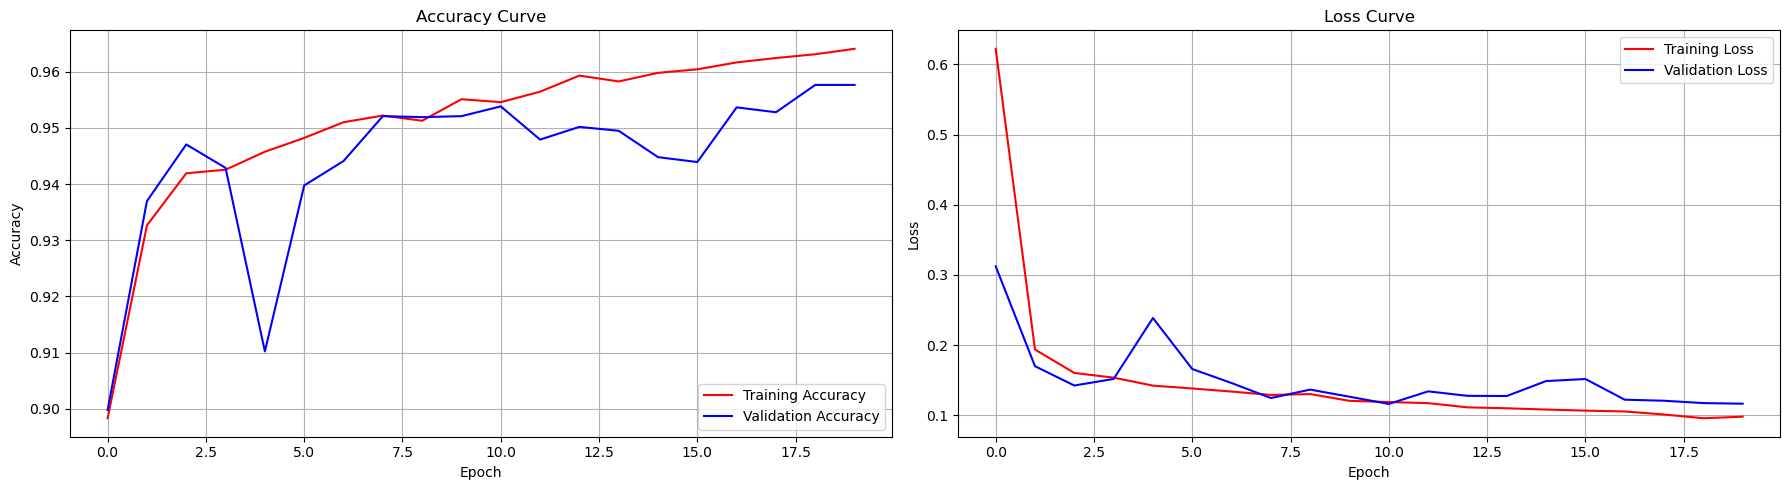

In [16]:
plot_loss_accuracy(history2)

In [17]:
y_train_pred = model.predict(X_train)
y_train_pred = y_train_pred.argmax(axis=-1)

y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.argmax(axis=-1)

180/180 [==============================] - 0s 897us/step


In [18]:
class_names=['N','S1','S2','S3']

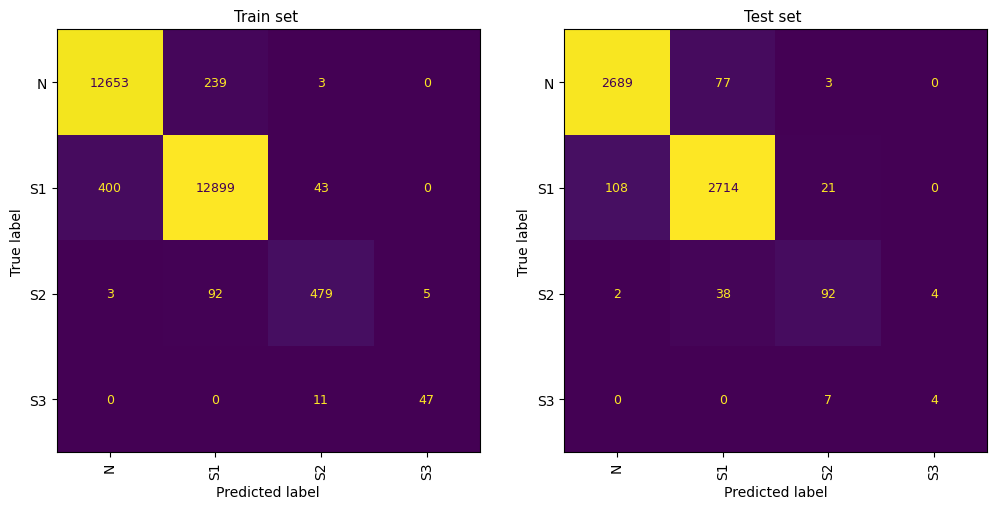

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0], display_labels=class_names).im_.colorbar.remove()
axs[0].set_title("Train set ")
axs[0].tick_params(axis='x', labelrotation=90)

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=axs[1], display_labels=class_names).im_.colorbar.remove()
axs[1].set_title("Test set ")
axs[1].tick_params(axis='x', labelrotation=90)

plt.show()

## Binary Classification

In [20]:
y = data['label']
label_mapping = {'N': 0, 'S1': 1, 'S2':1, 'S3':1}
y= y.replace(label_mapping)

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(num_mfccs, 13, 1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1,activation='sigmoid')) 
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3=model1.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
840/840 [==============================] - 3s 3ms/step - loss: 0.4214 - accuracy: 0.9208 - val_loss: 0.1384 - val_accuracy: 0.9552
Epoch 2/20
840/840 [==============================] - 3s 3ms/step - loss: 0.1506 - accuracy: 0.9459 - val_loss: 0.1547 - val_accuracy: 0.9458
Epoch 3/20
840/840 [==============================] - 3s 3ms/step - loss: 0.1211 - accuracy: 0.9544 - val_loss: 0.1261 - val_accuracy: 0.9495
Epoch 4/20
840/840 [==============================] - 3s 3ms/step - loss: 0.1083 - accuracy: 0.9600 - val_loss: 0.1017 - val_accuracy: 0.9611
Epoch 5/20
840/840 [==============================] - 3s 3ms/step - loss: 0.1019 - accuracy: 0.9613 - val_loss: 0.1223 - val_accuracy: 0.9526
Epoch 6/20
840/840 [==============================] - 3s 3ms/step - loss: 0.0974 - accuracy: 0.9637 - val_loss: 0.0979 - val_accuracy: 0.9632
Epoch 7/20
840/840 [==============================] - 3s 3ms/step - loss: 0.0912 - accuracy: 0.9676 - val_loss: 0.0883 - val_accuracy: 0.9649
Epoch 

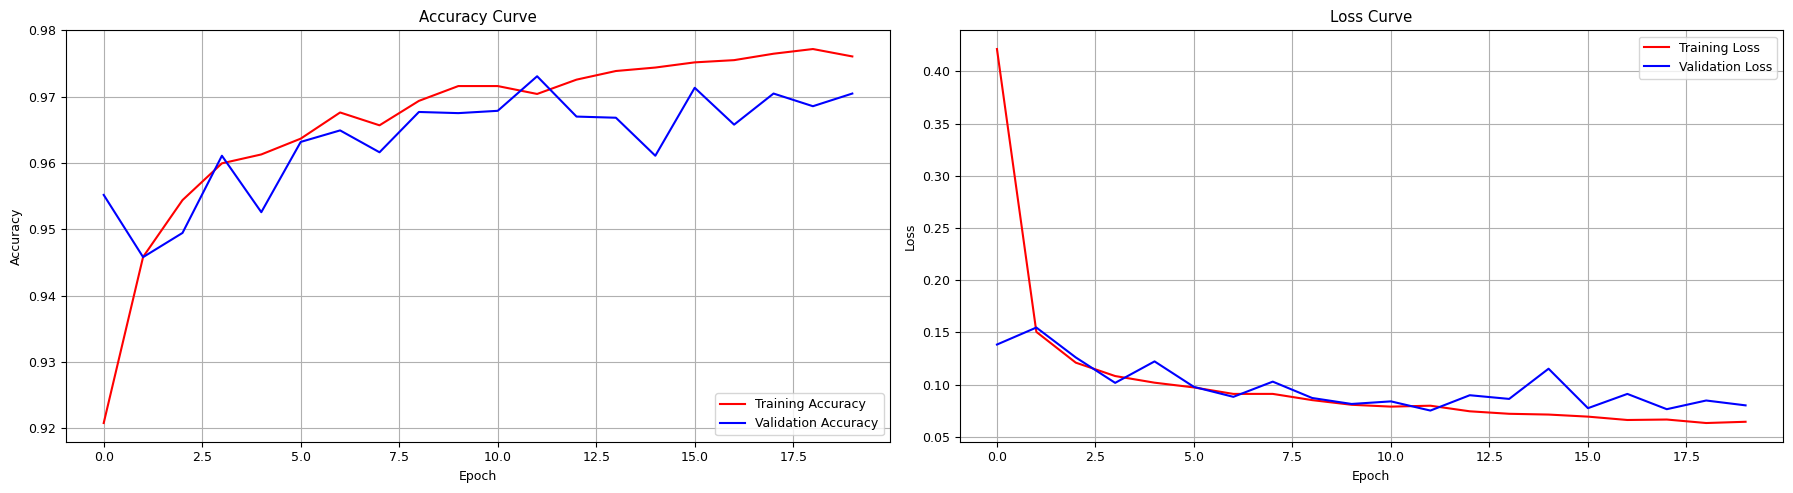

In [23]:
plot_loss_accuracy(history3)

In [24]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(num_mfccs, 13, 1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, kernel_size=(3, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1,activation='sigmoid')) 
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history4=model1.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
840/840 [==============================] - 6s 6ms/step - loss: 0.2248 - accuracy: 0.9232 - val_loss: 0.1414 - val_accuracy: 0.9378
Epoch 2/20
840/840 [==============================] - 6s 7ms/step - loss: 0.1338 - accuracy: 0.9476 - val_loss: 0.1126 - val_accuracy: 0.9595
Epoch 3/20
840/840 [==============================] - 5s 6ms/step - loss: 0.1204 - accuracy: 0.9535 - val_loss: 0.0970 - val_accuracy: 0.9618
Epoch 4/20
840/840 [==============================] - 5s 5ms/step - loss: 0.1062 - accuracy: 0.9599 - val_loss: 0.1093 - val_accuracy: 0.9601
Epoch 5/20
840/840 [==============================] - 5s 5ms/step - loss: 0.1051 - accuracy: 0.9612 - val_loss: 0.1000 - val_accuracy: 0.9615
Epoch 6/20
840/840 [==============================] - 5s 5ms/step - loss: 0.0996 - accuracy: 0.9630 - val_loss: 0.0867 - val_accuracy: 0.9670
Epoch 7/20
840/840 [==============================] - 5s 6ms/step - loss: 0.0964 - accuracy: 0.9630 - val_loss: 0.0957 - val_accuracy: 0.9641
Epoch 

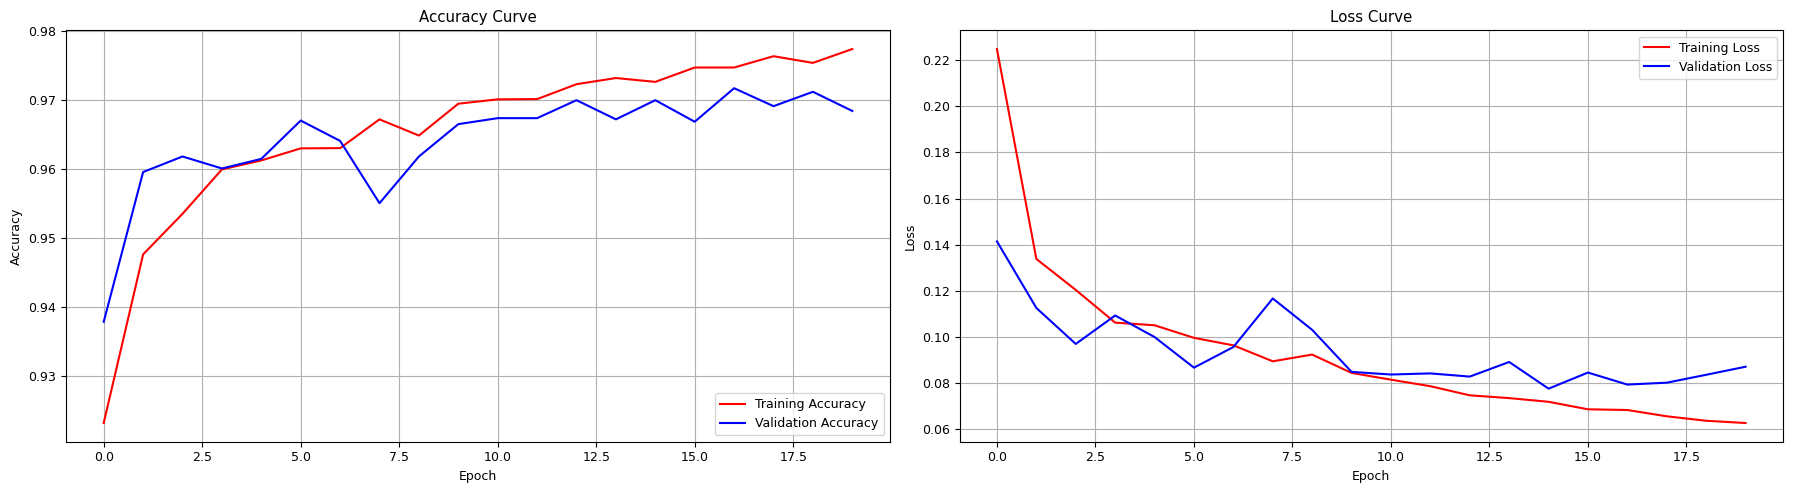

In [25]:
plot_loss_accuracy(history4)

In [26]:
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)
y_train_pred1 = (y_train_pred1 >= 0.5).astype(int)
y_test_pred1 = (y_test_pred1 >= 0.5).astype(int)

180/180 [==============================] - 0s 1ms/step


In [27]:
class_names1=['N','S']

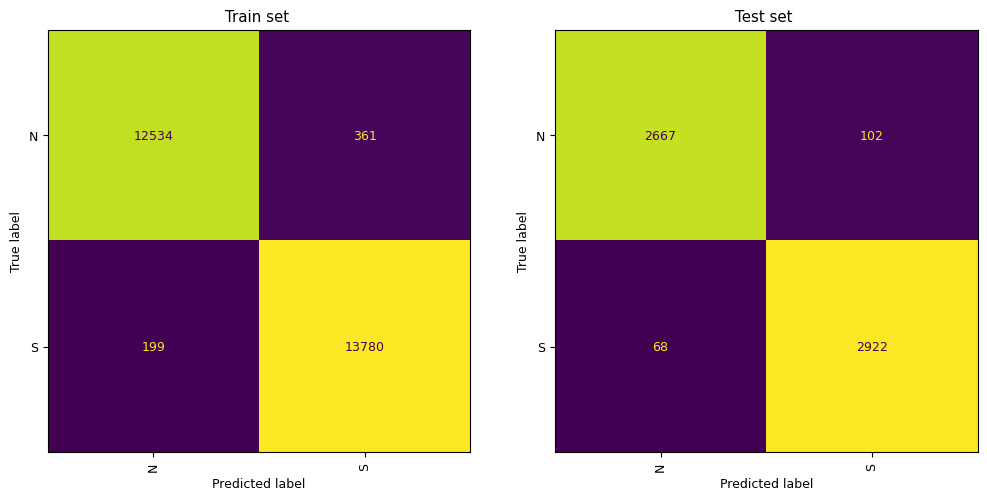

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred1, ax=axs[0], display_labels=class_names1).im_.colorbar.remove()
axs[0].set_title("Train set ")
axs[0].tick_params(axis='x', labelrotation=90)

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred1, ax=axs[1], display_labels=class_names1).im_.colorbar.remove()
axs[1].set_title("Test set ")
axs[1].tick_params(axis='x', labelrotation=90)

plt.show()